<a href="https://colab.research.google.com/github/Shehab37/gans/blob/main/tf_dcgan_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [57]:
X_train = keras.datasets.fashion_mnist.load_data()
X_train = X_train[0][0]
X_train_dcgan = X_train / 255.0
X_train_dcgan = X_train_dcgan.reshape(-1, 28, 28, 1) * 2. - 1.0 

In [58]:
batch_size = 32
X_train_dcgan = tf.cast(X_train_dcgan,tf.float32) # as the generated images from the generator are float32 so they must be the same type
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [59]:
codings_size = 100
generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME",
                                 activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME",
                                 activation="tanh"),
])
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])

gan = keras.models.Sequential([generator, discriminator])

In [60]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [61]:
def plot_images(imgs):
  fig = plt.figure(figsize=(5, 5))
  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(imgs[i],cmap='gray')
    plt.axis('off')
  plt.show()

In [64]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
  generator, discriminator = gan.layers
  for epoch in range(n_epochs):
    print("Epoch {}/{}".format(epoch + 1, n_epochs))              # not shown in the book
    for X_batch in tqdm(dataset):
      # training the discriminator
      noise = tf.random.normal(shape=[batch_size, codings_size])
      generated_images = generator(noise)
      X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
      y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
      discriminator.trainable = True
      discriminator.train_on_batch(X_fake_and_real, y1)
      # training the generator
      noise = tf.random.normal(shape=[batch_size, codings_size])
      y2 = tf.constant([[1.]] * batch_size)
      discriminator.trainable = False
      gan.train_on_batch(noise, y2)
    # for ploting the generated images
    generated_images = ((generated_images+1)/2.0)*255.0
    generated_images = tf.cast(tf.reshape(generated_images, (32,28,28)),tf.int32)
    plot_images(generated_images)



  0%|          | 1/1875 [00:00<04:10,  7.48it/s]

Epoch 1/10


100%|██████████| 1875/1875 [00:49<00:00, 37.67it/s]


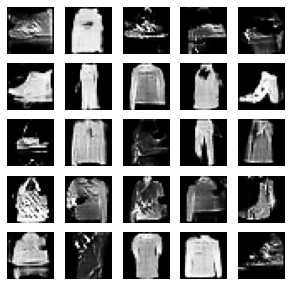

  0%|          | 1/1875 [00:00<04:23,  7.11it/s]

Epoch 2/10


100%|██████████| 1875/1875 [00:45<00:00, 41.14it/s]


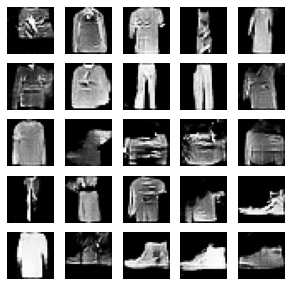

  0%|          | 1/1875 [00:00<04:26,  7.02it/s]

Epoch 3/10


100%|██████████| 1875/1875 [00:46<00:00, 40.54it/s]


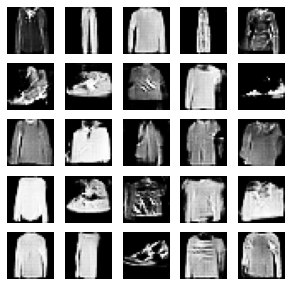

  0%|          | 1/1875 [00:00<04:14,  7.36it/s]

Epoch 4/10


100%|██████████| 1875/1875 [00:46<00:00, 40.52it/s]


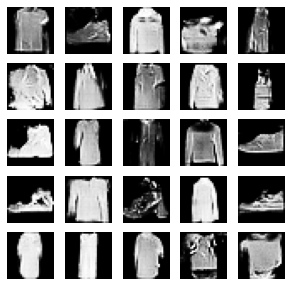

  0%|          | 1/1875 [00:00<04:23,  7.10it/s]

Epoch 5/10


100%|██████████| 1875/1875 [00:49<00:00, 38.03it/s]


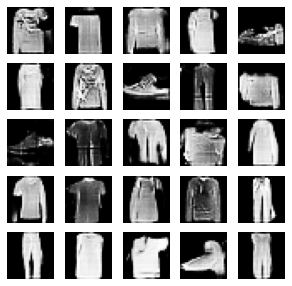

  0%|          | 1/1875 [00:00<04:25,  7.06it/s]

Epoch 6/10


100%|██████████| 1875/1875 [00:46<00:00, 40.01it/s]


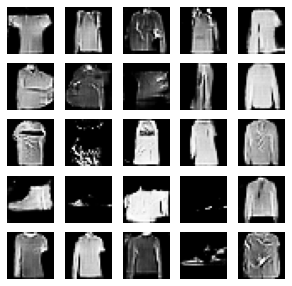

  0%|          | 1/1875 [00:00<04:37,  6.75it/s]

Epoch 7/10


100%|██████████| 1875/1875 [01:22<00:00, 22.86it/s]


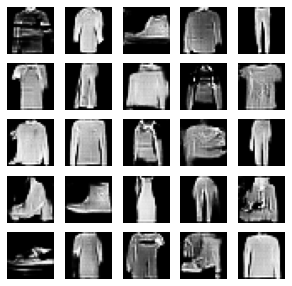

  0%|          | 1/1875 [00:00<04:58,  6.27it/s]

Epoch 8/10


100%|██████████| 1875/1875 [00:50<00:00, 37.37it/s]


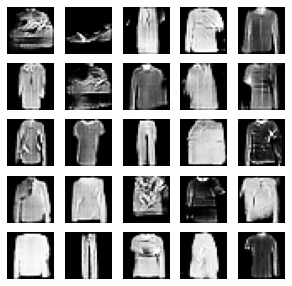

  0%|          | 1/1875 [00:00<04:33,  6.85it/s]

Epoch 9/10


100%|██████████| 1875/1875 [00:50<00:00, 37.18it/s]


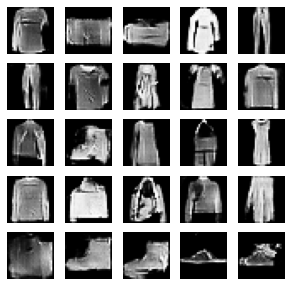

  0%|          | 1/1875 [00:00<04:32,  6.88it/s]

Epoch 10/10


100%|██████████| 1875/1875 [00:50<00:00, 37.08it/s]


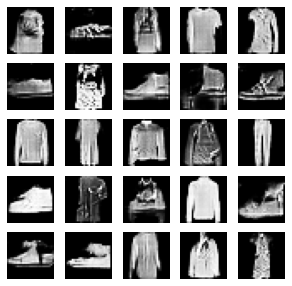

In [67]:
train_gan(gan, dataset, batch_size, codings_size,n_epochs = 10)